In [35]:
import igraph
import matplotlib.pyplot as plt
import numpy as np 

# Parameters for the ER graph
N = 100  # Number of nodes
NN = 1000  # Number of graphs to generate for each pù

pstart = 0.001  # starting value
pstop = 0.050 # ending value
pstep = 0.001  # step size

# generate the array of values using numpy
ps = np.arange(pstart, pstop + pstep, pstep, dtype=float)

In [36]:
import scienceplots # se non c'è, in terminale scrivere: pip install SciencePlots
plt.style.use(['science','notebook','grid'])

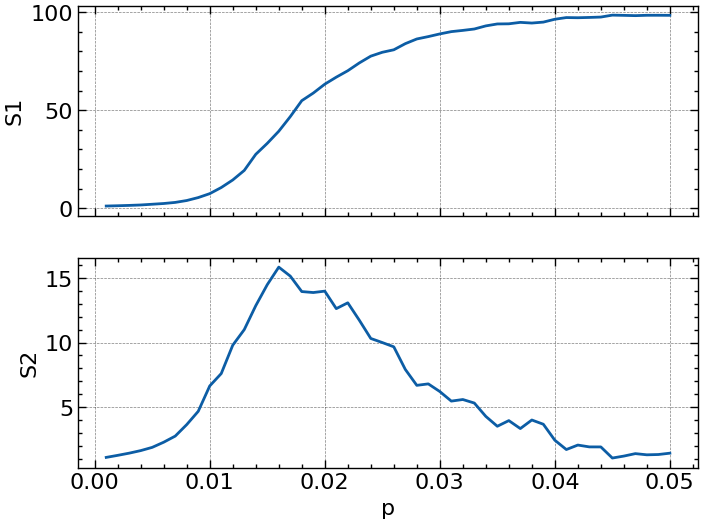

In [37]:
# Lists to store the results
avg_first_sizes = []
avg_second_sizes = []

# Loop over values of p
for p in ps:
    # Lists to store the sizes of the first and second connected components for each graph
    first_sizes = []
    second_sizes = []

    # Generate NN graphs with the given p
    for i in range(NN):
        g = igraph.Graph.Erdos_Renyi(n=N, p=p)
        components = g.components()
        if len(components) == 1:
            first_sizes.append(len(components[0]))
            second_sizes.append(0)
        else:
            first_sizes.append(len(components[0]))
            second_sizes.append(len(components[1]))

    # Calculate the average sizes of the first and second connected components
    avg_first_size = sum(first_sizes) / len(first_sizes)
    avg_second_size = sum(second_sizes) / len(second_sizes)

    # Add the results to the lists
    avg_first_sizes.append(avg_first_size)
    avg_second_sizes.append(avg_second_size)

# Plot the results
fig, (ax1, ax2) = plt.subplots(2, 1, sharex=True)

ax1.plot(ps, avg_first_sizes)
ax1.set_ylabel('S1')

ax2.plot(ps, avg_second_sizes)
ax2.set_ylabel('S2')
ax2.set_xlabel('p')

plt.show()

In [38]:
x = ps
y = avg_first_sizes

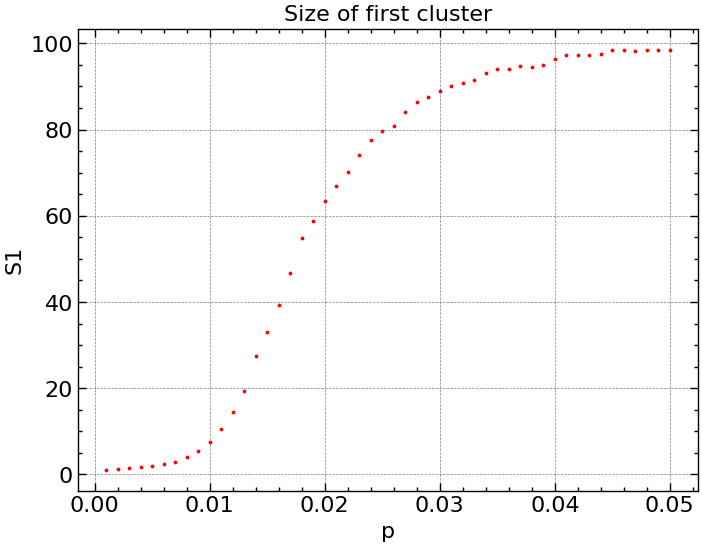

In [39]:
plt.figure(figsize=(8,6)) #must come BEFORE the actual plot
#plt.plot(x, y, "ro") #Alpha is the opacity, density is the normalization
#plt.errorbar(x, y, yerr, ls='', color='k')
plt.scatter(x, y, color='r', s=3, zorder=1000)
#plt.locator_params(y=20) this is about the density of thicks on both axis I could add <, axis='x'> inside the parentesis, to do just for one axis

plt.xlabel("p")
plt.ylabel('S1')

plt.title('Size of first cluster')

plt.yscale('linear')
plt.xscale('linear')

plt.show()